<a href="https://colab.research.google.com/github/pierce-s/MAT-421/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student: Pierce Sarmiento

---

#**Module H** 
**22.1** ODE Initial Value Problem

**22.2** Reduction of Order

**22.3** The Euler Method


---


**Section 22.1: ODE Initial Value**

*Summary:*

While solving ordinary differential equations analytically provides elegant and exact solutions, there are many real-world problems where it is not possible to obtain a closed-form solution. In such cases, numerical methods can be used to obtain an approximate solution to the ODE. Python provides several libraries such as NumPy, SciPy, and SymPy that allow for efficient and accurate numerical solutions to ODEs.


---


*Implementation:*

One interesting ODE involves the predator/prey models. We can construct a simple illustration of predator and prey population using python, with an analytical solution:

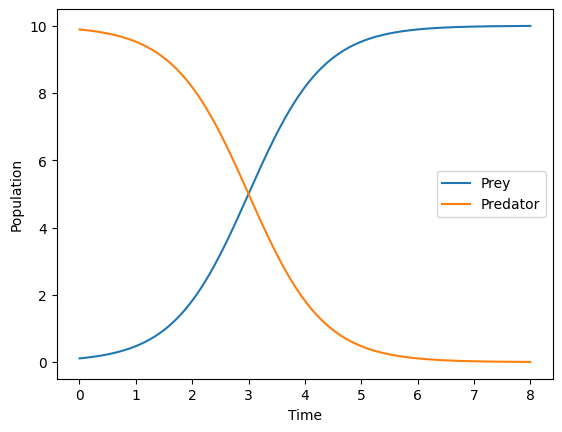

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
a = 1.0
b = 0.1
c = 1.5
d = 0.075

# Define the initial populations
x0 = 10.0
y0 = 5.0

# Define the solutions (analytically)
t_eval = np.linspace(0.0, 8.0, 1000)
k = (x0 / b) - (a / b)
x = (a / b) / (1 + k * np.exp(-c * t_eval / a))
y = (a / b) - x

# Plot the solutions
plt.plot(t_eval, x, label='Prey')
plt.plot(t_eval, y, label='Predator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

This is a good example of an ODE because we are comparing the rate of change of two different variables over time. This example can be understood analytically, we may have to use numerical methods to find solutions for other ODEs.

**Section 22.2: Reduction of Order**

*Summary:*

We reduce the order of a higher-order differential equation to a system of first-order differential equations by introducing a state vector. This allows us to express the original higher-order differential equation as a system of first-order differential equations that are coupled together. We can then solve this system numerically using standard numerical methods like the Runge-Kutta method.

---


*Implementation:*

Let's consider a second-order differential equation:

$y''(t) + 2y'(t) + 1 = 0, y(0) = 1, y'(0) = 0$'

To reduce the order of this equation, we introduce a state vector:

$S(t) = [y(t), y'(t)]$

Then we can rewrite the original differential equation as a system of first-order differential equations:

$S'(t) = [y'(t), y''(t)] = [y'(t), -2y'(t) - 1] = F(t, S(t))$

Now we can solve this system of first-order differential equations using numerical methods. For example, we can use the fourth-order Runge-Kutta method to solve this system numerically:

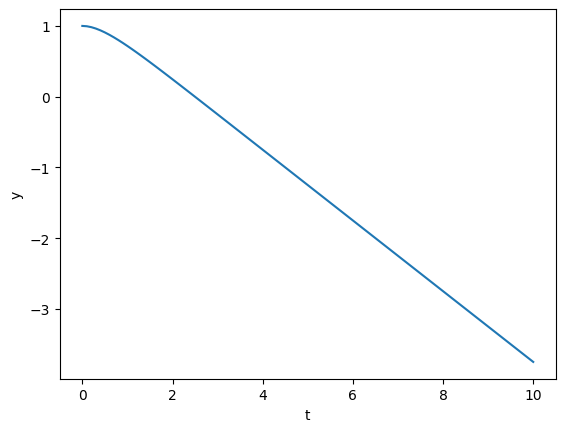

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def F(t, S):
    y, y_prime = S
    return [y_prime, -2*y_prime - 1]

# Define the initial conditions
t0 = 0
tf = 10
h = 0.1

# Descretized time steps
t = np.arange(t0, tf + h, h)
S = np.zeros((len(t), 2))
S[0] = [1, 0]  # initial condition

# Solve using the fourth-order Runge-Kutta method
for i in range(len(t) - 1):
    k1 = h * np.array(F(t[i], S[i]))
    k2 = h * np.array(F(t[i] + h/2, S[i] + k1/2))
    k3 = h * np.array(F(t[i] + h/2, S[i] + k2/2))
    k4 = h * np.array(F(t[i] + h, S[i] + k3))
    S[i+1] = S[i] + (k1 + 2*k2 + 2*k3 + k4)/6

# Plot solution
y = S[:, 0]
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

**Section 22.3: The Euler Method**

*Summary:*

The Euler method is a simple numerical method for solving ordinary differential equations. The basic idea of the method is to approximate the solution of a differential equation at a given time step using the derivative of the solution at that time step.

---


*Implementation:*

We can implement a similar solution to the previous section but using Euler's method instead.

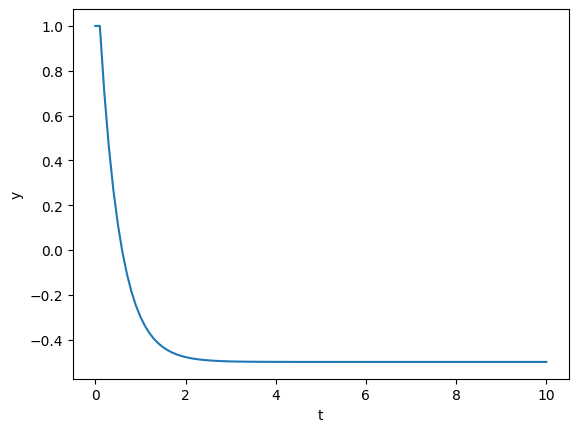

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -2*y - 1

# Define the initial conditions 
t0 = 0
tf = 10
h = 0.1
y0 = 1
y1 = 0

# Discretized time steps
t = np.arange(t0, tf + h, h)
y = np.zeros(len(t))
y[0] = y0
y[1] = y0 + h*y1

# Euler's method
for i in range(1, len(t)-1):
    y[i+1] = y[i] + h*f(t[i], y[i])

# Plot solution
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

